# Importar libreria

In [1]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar dataset

In [2]:
df_num_internetusers = pd.read_csv('number-of-internet-users-by-country.csv')
df_share_internetusers= pd.read_csv('share-of-individuals-using-the-internet.csv')
df_penetration=pd.read_csv('broadband-penetration-by-country.csv')
df_geo=pd.read_csv('geography.csv')

En este Notebook empleamos 4 dataset diferentes.
Por un lado el dataset de geography con las países, regiones y sub regiones del mundo, el cual hemos obtenido en el Notebook 1_Clasificacion_Regiones_GruposIngresos.ipynb.
Por otro lado, otros tres dataset con datos sobre la evolución del num de usuarios de internet, usuarios en porcentaje, y broadband penetration. Estos son de kaggle, enlace: https://www.kaggle.com/datasets/pavan9065/internet-usage

# Visualizar dataset: shape, info(), duplicated, nulls

## Dataset geography

In [3]:
df_geo.shape

(233, 5)

In [4]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Region Name                           233 non-null    object
 1   Sub-region Name                       233 non-null    object
 2   Country Name                          233 non-null    object
 3   ISO3 Code                             233 non-null    object
 4   Grupo de Ingresos del Banco Mundial   233 non-null    object
dtypes: object(5)
memory usage: 9.2+ KB


In [5]:
df_geo.head()

,Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
0,Africa,Northern Africa,Algeria,DZA,Ingreso mediano bajo
1,Africa,Northern Africa,Egypt,EGY,Ingreso mediano bajo
2,Africa,Northern Africa,Libya,LBY,Ingreso mediano alto
3,Africa,Northern Africa,Morocco,MAR,Ingreso mediano bajo
4,Africa,Northern Africa,Sudan,SDN,Ingreso bajo


In [6]:
df_geo.duplicated().sum()

0

In [7]:
df_geo.isnull().sum()

Region Name                             0
Sub-region Name                         0
Country Name                            0
ISO3 Code                               0
Grupo de Ingresos del Banco Mundial     0
dtype: int64

In [8]:
#crear una función que me muestre las columnas con valores nulos y su porcentaje.
def n_nulls(df):
    for c in df.columns:
        pct_missing = df[c].isna().mean()
        print('{} - {}%'.format(c, round(pct_missing*100)))

<AxesSubplot: >

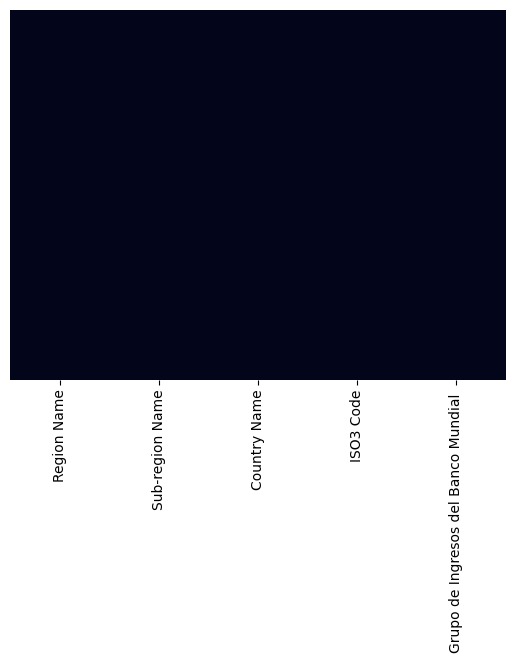

In [9]:
sns.heatmap(df_geo.isnull(),cbar=False, cmap='rocket', yticklabels=False)

In [10]:
px.scatter(df_geo, x='ISO3 Code', y='Region Name',color='Sub-region Name',width=1000, height=600,color_discrete_sequence=px.colors.sequential.RdBu)

In [11]:
region=df_geo['Region Name'].value_counts().sort_values(ascending=False)
region

Africa      58
Americas    53
Asia        50
Europe      48
Oceania     24
Name: Region Name, dtype: int64

In [12]:
fig = px.choropleth(df_geo, locations='Country Name', locationmode='country names',color='Region Name', color_continuous_scale= 'Tealgrn')
fig.show()#visualizamos la clasificacion por regiones

In [13]:
fig = px.choropleth(df_geo, locations='Country Name', locationmode='country names',color='Sub-region Name', color_continuous_scale= 'Tealgrn')
fig.show()#visualizamos la clasifiacion por subregiones

In [14]:
fig = px.choropleth(df_geo, locations='Country Name', locationmode='country names',color='Grupo de Ingresos del Banco Mundial ', color_continuous_scale= 'Tealgrn')
fig.show()#visualizamos la clasificacion por grupos de ingresos

In [15]:
df_geo[df_geo['Country Name']=='United States of America']

,Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
110,Americas,Northern America,United States of America,USA,Ingreso alto


In [16]:
df_geo2= df_geo.copy()

In [17]:
df_geo2['Country Name'].replace(to_replace=['United States of America'], value=['United States'],inplace=True)#renombramos para que coincida con el nombre de los dataset de kaggle

In [18]:
df_geo[df_geo['Country Name']=='Russian Federation']

,Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
168,Europe,Eastern Europe,Russian Federation,RUS,Ingreso mediano alto


In [19]:
df_geo2['Country Name'].replace(to_replace=['Russian Federation'], value=['Russia'],inplace=True)#renombrammos para que coincida con el nombre de los dataset de kaggle

## Dataset Penetration

In [20]:
df_penetration.head()

,Entity,Code,Year,Fixed broadband subscriptions (per 100 people)
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


In [21]:
df_penetration.shape

(4175, 4)

In [22]:
df_penetration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          4175 non-null   object 
 1   Code                                            3375 non-null   object 
 2   Year                                            4175 non-null   int64  
 3   Fixed broadband subscriptions (per 100 people)  4175 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 130.6+ KB


In [23]:
df_penetration.isnull().sum()

Entity                                              0
Code                                              800
Year                                                0
Fixed broadband subscriptions (per 100 people)      0
dtype: int64

<AxesSubplot: >

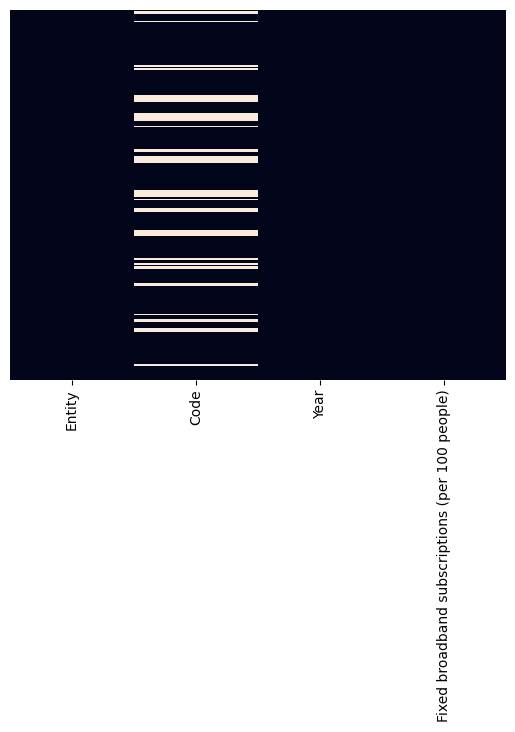

In [24]:
sns.heatmap(df_penetration.isnull(),cbar=False, cmap='rocket', yticklabels=False)

In [25]:
n_nulls(df_penetration)

Entity - 0%
Code - 19%
Year - 0%
Fixed broadband subscriptions (per 100 people) - 0%


In [26]:
df_penetration[df_penetration['Code'].isna()]

,Entity,Code,Year,Fixed broadband subscriptions (per 100 people)
15,Africa Eastern and Southern,NaN,2005,0.061410
16,Africa Eastern and Southern,NaN,2006,0.112406
17,Africa Eastern and Southern,NaN,2007,0.133732
18,Africa Eastern and Southern,NaN,2008,0.145391
19,Africa Eastern and Southern,NaN,2009,0.180794
...,...,...,...,...
4012,Upper middle income,NaN,2015,16.487394
4013,Upper middle income,NaN,2016,18.515169
4014,Upper middle income,NaN,2017,21.622992
4015,Upper middle income,NaN,2018,22.638713


In [27]:
df_penetration.duplicated().sum()

0

## Dataset Number of internet users by country

### Ver el contenido del dataset y analizar columnas

In [28]:
df_num_internetusers.shape

(4536, 4)

In [29]:
df_num_internetusers.dtypes

Entity                                              object
Code                                                object
Year                                                 int64
Number of internet users (OWID based on WB & UN)     int64
dtype: object

In [30]:
df_num_internetusers.head()

,Entity,Code,Year,Number of internet users (OWID based on WB & UN)
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,2001,990
2,Afghanistan,AFG,2002,1003
3,Afghanistan,AFG,2003,20272
4,Afghanistan,AFG,2004,25520


In [31]:
df_num_internetusers.isnull().sum()

Entity                                               0
Code                                                22
Year                                                 0
Number of internet users (OWID based on WB & UN)     0
dtype: int64

<AxesSubplot: >

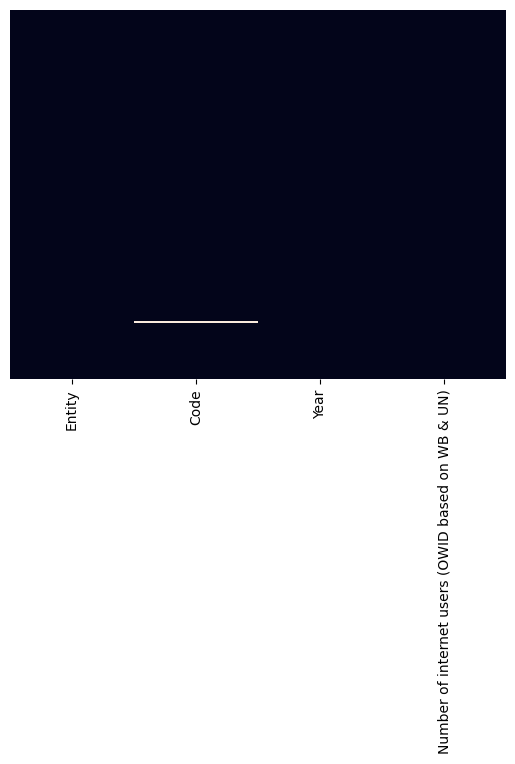

In [32]:
sns.heatmap(df_num_internetusers.isnull(),cbar=False, cmap='rocket', yticklabels=False)

In [33]:
df_num_internetusers[df_num_internetusers['Code'].isna()]

,Entity,Code,Year,Number of internet users (OWID based on WB & UN)
3825,Sub-Saharan Africa,NaN,1990,0
3826,Sub-Saharan Africa,NaN,1996,405593
3827,Sub-Saharan Africa,NaN,1997,781014
3828,Sub-Saharan Africa,NaN,1998,1457807
3829,Sub-Saharan Africa,NaN,1999,2299787
3830,Sub-Saharan Africa,NaN,2000,3284011
3831,Sub-Saharan Africa,NaN,2001,4307745
3832,Sub-Saharan Africa,NaN,2002,5678149
3833,Sub-Saharan Africa,NaN,2003,7785382
3834,Sub-Saharan Africa,NaN,2004,10838288


In [34]:
n_nulls(df_num_internetusers)

Entity - 0%
Code - 0%
Year - 0%
Number of internet users (OWID based on WB & UN) - 0%


In [35]:
df_num_internetusers.duplicated().sum()

0

## Dataset share_internetusers

In [36]:
df_share_internetusers.shape

(7119, 4)

In [37]:
df_share_internetusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7119 entries, 0 to 7118
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            7119 non-null   object 
 1   Code                                              5780 non-null   object 
 2   Year                                              7119 non-null   int64  
 3   Individuals using the Internet (% of population)  7119 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.6+ KB


In [38]:
df_share_internetusers.head()

,Entity,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [39]:
df_share_internetusers.duplicated().sum()

0

In [40]:
df_share_internetusers.isnull().sum()

Entity                                                 0
Code                                                1339
Year                                                   0
Individuals using the Internet (% of population)       0
dtype: int64

<AxesSubplot: >

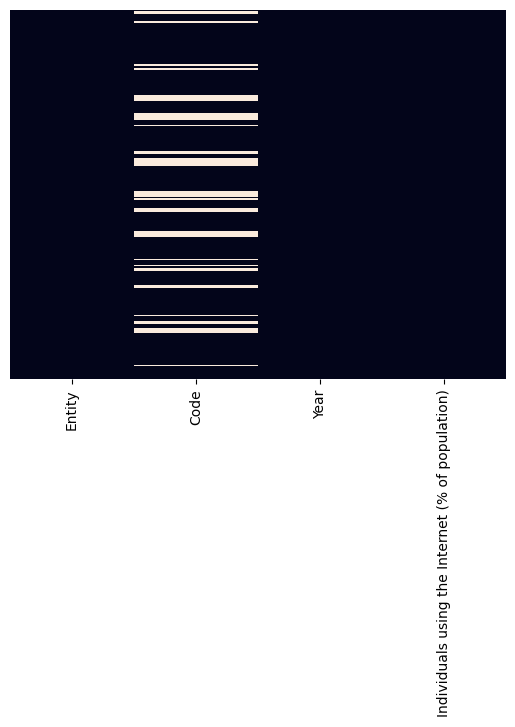

In [41]:
sns.heatmap(df_share_internetusers.isnull(),cbar=False, cmap='rocket', yticklabels=False)

In [42]:
df_share_internetusers[df_share_internetusers['Code'].isna()]

,Entity,Code,Year,Individuals using the Internet (% of population)
22,Africa Eastern and Southern,NaN,1990,0.000000
23,Africa Eastern and Southern,NaN,1991,0.001599
24,Africa Eastern and Southern,NaN,1992,0.004664
25,Africa Eastern and Southern,NaN,1993,0.013609
26,Africa Eastern and Southern,NaN,1994,0.029658
...,...,...,...,...
6856,Upper middle income,NaN,2013,46.783103
6857,Upper middle income,NaN,2014,49.389453
6858,Upper middle income,NaN,2015,53.161580
6859,Upper middle income,NaN,2016,55.786069


In [43]:
n_nulls(df_share_internetusers)

Entity - 0%
Code - 19%
Year - 0%
Individuals using the Internet (% of population) - 0%


# Merge dataset

Unimos dataset: 'share of individuals using internet' & 'geography'

In [44]:
df_share_internetusers.columns

Index(['Entity', 'Code', 'Year',
       'Individuals using the Internet (% of population)'],
      dtype='object')

In [45]:
df_geo2.columns

Index(['Region Name', 'Sub-region Name', 'Country Name', 'ISO3 Code',
       'Grupo de Ingresos del Banco Mundial '],
      dtype='object')

In [46]:
df=pd.merge(df_share_internetusers, df_geo2, left_on='Entity',right_on='Country Name',how='left' )
df.head()

,Entity,Code,Year,Individuals using the Internet (% of population),Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
0,Afghanistan,AFG,1990,0.0,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo
1,Afghanistan,AFG,1991,0.0,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo
2,Afghanistan,AFG,1992,0.0,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo
3,Afghanistan,AFG,1993,0.0,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo
4,Afghanistan,AFG,1994,0.0,Asia,Southern Asia,Afghanistan,AFG,Ingreso bajo


In [47]:
df_share_internetusers.shape

(7119, 4)

In [48]:
df.shape

(7119, 9)

In [49]:
df.isnull().sum()

Entity                                                 0
Code                                                1339
Year                                                   0
Individuals using the Internet (% of population)       0
Region Name                                         1989
Sub-region Name                                     1989
Country Name                                        1989
ISO3 Code                                           1989
Grupo de Ingresos del Banco Mundial                 1989
dtype: int64

In [50]:
df[df['Country Name'].isna()]

,Entity,Code,Year,Individuals using the Internet (% of population),Region Name,Sub-region Name,Country Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
22,Africa Eastern and Southern,NaN,1990,0.000000,NaN,NaN,NaN,NaN,NaN
23,Africa Eastern and Southern,NaN,1991,0.001599,NaN,NaN,NaN,NaN,NaN
24,Africa Eastern and Southern,NaN,1992,0.004664,NaN,NaN,NaN,NaN,NaN
25,Africa Eastern and Southern,NaN,1993,0.013609,NaN,NaN,NaN,NaN,NaN
26,Africa Eastern and Southern,NaN,1994,0.029658,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7029,World,OWID_WRL,2013,36.639144,NaN,NaN,NaN,NaN,NaN
7030,World,OWID_WRL,2014,39.858527,NaN,NaN,NaN,NaN,NaN
7031,World,OWID_WRL,2015,41.692071,NaN,NaN,NaN,NaN,NaN
7032,World,OWID_WRL,2016,44.844248,NaN,NaN,NaN,NaN,NaN


In [51]:
#Hacemos una copia antes de eliminar columnas
data= df.copy()

In [52]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Individuals using the Internet (% of population)', 'Region Name',
       'Sub-region Name', 'Country Name', 'ISO3 Code',
       'Grupo de Ingresos del Banco Mundial '],
      dtype='object')

In [53]:
data=data[['Entity','ISO3 Code','Region Name','Sub-region Name','Year','Individuals using the Internet (% of population)','Grupo de Ingresos del Banco Mundial ']]
data.head()

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo


Las columnas 'Entity' y 'Country Name' nos dan información similar. Nos quedamos con la columna Entity, ya que algunas areas como Wordl, OECD, Least developed countries, no son Países, pero pueden ser interesantes para nuestro estudio.Posteriormenet subsivideremos nuestro dataset, para tener por un lado los países y por otro las areas.

In [54]:
df_penetration.columns

Index(['Entity', 'Code', 'Year',
       'Fixed broadband subscriptions (per 100 people)'],
      dtype='object')

In [55]:
df_penetration.head()

,Entity,Code,Year,Fixed broadband subscriptions (per 100 people)
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


In [56]:
df_penetration.drop('Code',axis=1,inplace=True)
data2=pd.merge(data,df_penetration,how='left')
data2.head(10)

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people)
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.000000,Ingreso bajo,NaN
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.000000,Ingreso bajo,NaN
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.000000,Ingreso bajo,NaN
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.000000,Ingreso bajo,NaN
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.000000,Ingreso bajo,NaN
5,Afghanistan,AFG,Asia,Southern Asia,1995,0.000000,Ingreso bajo,NaN
6,Afghanistan,AFG,Asia,Southern Asia,2001,0.004723,Ingreso bajo,NaN
7,Afghanistan,AFG,Asia,Southern Asia,2002,0.004561,Ingreso bajo,NaN
8,Afghanistan,AFG,Asia,Southern Asia,2003,0.087891,Ingreso bajo,NaN
9,Afghanistan,AFG,Asia,Southern Asia,2004,0.105809,Ingreso bajo,0.000809


In [57]:
df_num_internetusers.drop('Code',axis=1,inplace=True)
data2=pd.merge(data2,df_num_internetusers,how='left')
data2.head(10)

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.000000,Ingreso bajo,NaN,0.0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.000000,Ingreso bajo,NaN,NaN
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.000000,Ingreso bajo,NaN,NaN
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.000000,Ingreso bajo,NaN,NaN
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.000000,Ingreso bajo,NaN,NaN
5,Afghanistan,AFG,Asia,Southern Asia,1995,0.000000,Ingreso bajo,NaN,NaN
6,Afghanistan,AFG,Asia,Southern Asia,2001,0.004723,Ingreso bajo,NaN,990.0
7,Afghanistan,AFG,Asia,Southern Asia,2002,0.004561,Ingreso bajo,NaN,1003.0
8,Afghanistan,AFG,Asia,Southern Asia,2003,0.087891,Ingreso bajo,NaN,20272.0
9,Afghanistan,AFG,Asia,Southern Asia,2004,0.105809,Ingreso bajo,0.000809,25520.0


In [58]:
data2.isnull().sum()

Entity                                                 0
ISO3 Code                                           1989
Region Name                                         1989
Sub-region Name                                     1989
Year                                                   0
Individuals using the Internet (% of population)       0
Grupo de Ingresos del Banco Mundial                 1989
Fixed broadband subscriptions (per 100 people)      3256
Number of internet users (OWID based on WB & UN)    2588
dtype: int64

<AxesSubplot: >

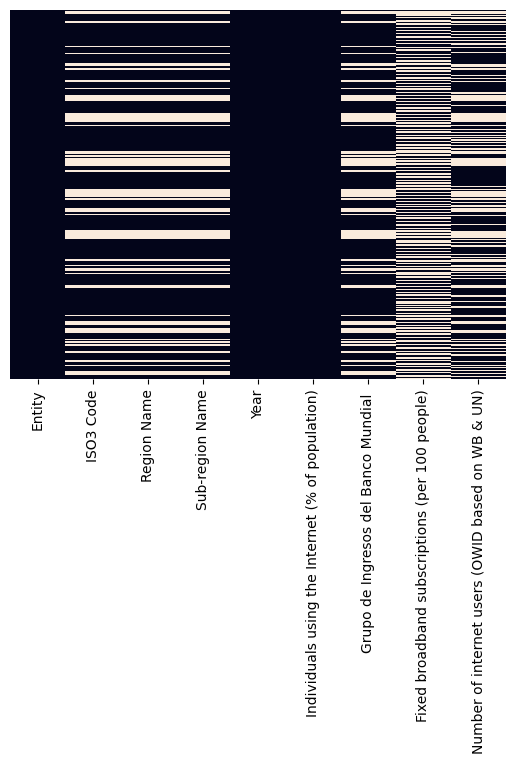

In [59]:
sns.heatmap(data2.isnull(),cbar=False,cmap='rocket', yticklabels=False)

# Subdividmos el dataset en dos

Nuestro estudio se centra en los "Países agrupados en Regiones y Sub regiones del mundo". Por tanto obtenemos un subdata frame con los países (columna ISO3 Code no nula) y comprobamos además que regiones y sub regiones no sean nulos.

In [60]:
data2[data2['ISO3 Code'].isna()]

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
22,Africa Eastern and Southern,NaN,NaN,NaN,1990,0.000000,NaN,NaN,NaN
23,Africa Eastern and Southern,NaN,NaN,NaN,1991,0.001599,NaN,NaN,NaN
24,Africa Eastern and Southern,NaN,NaN,NaN,1992,0.004664,NaN,NaN,NaN
25,Africa Eastern and Southern,NaN,NaN,NaN,1993,0.013609,NaN,NaN,NaN
26,Africa Eastern and Southern,NaN,NaN,NaN,1994,0.029658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7029,World,NaN,NaN,NaN,2013,36.639144,NaN,9.773011,2.649105e+09
7030,World,NaN,NaN,NaN,2014,39.858527,NaN,10.217115,2.902737e+09
7031,World,NaN,NaN,NaN,2015,41.692071,NaN,11.517014,3.175188e+09
7032,World,NaN,NaN,NaN,2016,44.844248,NaN,12.416622,3.419398e+09


In [61]:
data2[data2['Region Name'].isna()]

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
22,Africa Eastern and Southern,NaN,NaN,NaN,1990,0.000000,NaN,NaN,NaN
23,Africa Eastern and Southern,NaN,NaN,NaN,1991,0.001599,NaN,NaN,NaN
24,Africa Eastern and Southern,NaN,NaN,NaN,1992,0.004664,NaN,NaN,NaN
25,Africa Eastern and Southern,NaN,NaN,NaN,1993,0.013609,NaN,NaN,NaN
26,Africa Eastern and Southern,NaN,NaN,NaN,1994,0.029658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7029,World,NaN,NaN,NaN,2013,36.639144,NaN,9.773011,2.649105e+09
7030,World,NaN,NaN,NaN,2014,39.858527,NaN,10.217115,2.902737e+09
7031,World,NaN,NaN,NaN,2015,41.692071,NaN,11.517014,3.175188e+09
7032,World,NaN,NaN,NaN,2016,44.844248,NaN,12.416622,3.419398e+09


In [62]:
data2[data2['Sub-region Name'].isna()]

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
22,Africa Eastern and Southern,NaN,NaN,NaN,1990,0.000000,NaN,NaN,NaN
23,Africa Eastern and Southern,NaN,NaN,NaN,1991,0.001599,NaN,NaN,NaN
24,Africa Eastern and Southern,NaN,NaN,NaN,1992,0.004664,NaN,NaN,NaN
25,Africa Eastern and Southern,NaN,NaN,NaN,1993,0.013609,NaN,NaN,NaN
26,Africa Eastern and Southern,NaN,NaN,NaN,1994,0.029658,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7029,World,NaN,NaN,NaN,2013,36.639144,NaN,9.773011,2.649105e+09
7030,World,NaN,NaN,NaN,2014,39.858527,NaN,10.217115,2.902737e+09
7031,World,NaN,NaN,NaN,2015,41.692071,NaN,11.517014,3.175188e+09
7032,World,NaN,NaN,NaN,2016,44.844248,NaN,12.416622,3.419398e+09


In [63]:
df_zonas=data2[data2['ISO3 Code'].isna()]

In [64]:
df_zonas.head()#este dataset contiene las entity que un principio no nos interesan para el estudio. No obstante, más adelante anlaizaremos que Entity se alamacenan y alguna de ellas como por ejemplo World la usaremos en el estudio

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
22,Africa Eastern and Southern,NaN,NaN,NaN,1990,0.000000,NaN,NaN,NaN
23,Africa Eastern and Southern,NaN,NaN,NaN,1991,0.001599,NaN,NaN,NaN
24,Africa Eastern and Southern,NaN,NaN,NaN,1992,0.004664,NaN,NaN,NaN
25,Africa Eastern and Southern,NaN,NaN,NaN,1993,0.013609,NaN,NaN,NaN
26,Africa Eastern and Southern,NaN,NaN,NaN,1994,0.029658,NaN,NaN,NaN


<AxesSubplot: >

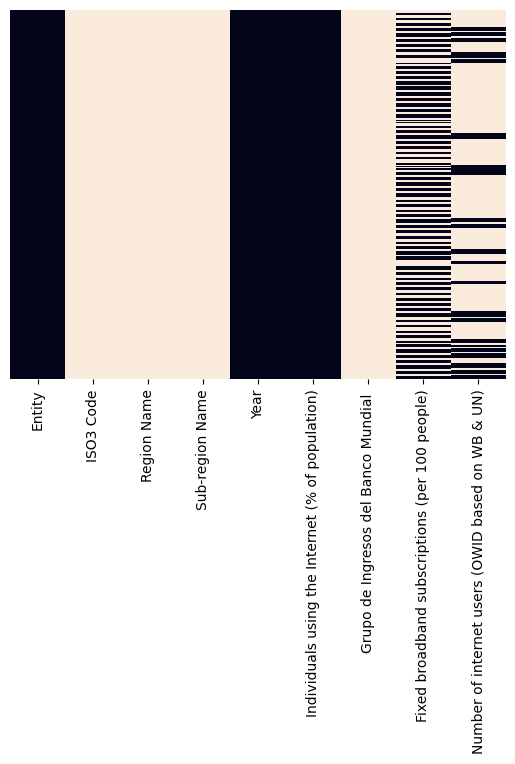

In [65]:
sns.heatmap(df_zonas.isnull(),cbar=False,cmap='rocket', yticklabels=False)

### Dataset final con regiones, subregiones y grupos de ingresos

In [66]:
#filas que queremos eliminar
drop_filas=data2[data2['ISO3 Code'].isna()]

In [67]:
internet=data2.drop(drop_filas.index, axis=0)
internet.head()

,Entity,ISO3 Code,Region Name,Sub-region Name,Year,Individuals using the Internet (% of population),Grupo de Ingresos del Banco Mundial,Fixed broadband subscriptions (per 100 people),Number of internet users (OWID based on WB & UN)
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN


<AxesSubplot: >

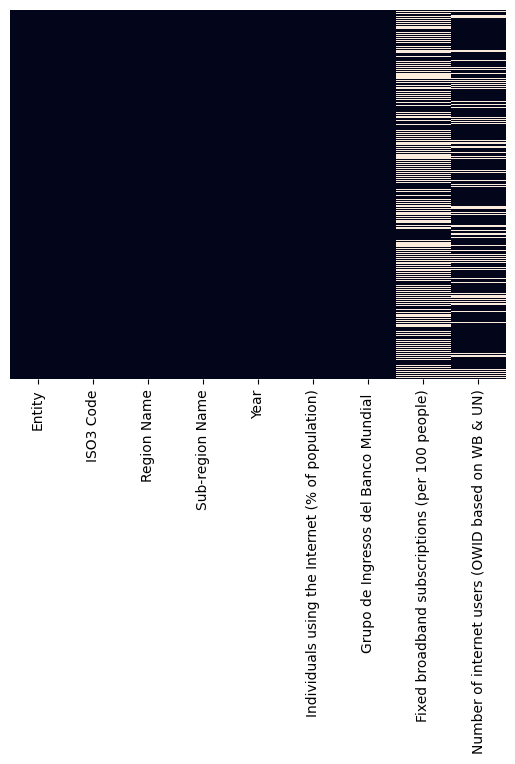

In [68]:
sns.heatmap(internet.isnull(),cbar=False,cmap='rocket', yticklabels=False)#Comprobamos que tenemos nuestro dataset con los datos para regiones y sub regiones no nulos

# Renombramos las variables

In [69]:
internet.rename(columns = {'Entity':'Country Name','Individuals using the Internet (% of population)':'Internet users (%)','Grupo de Ingresos del Banco Mundial ':'Grupo de Ingresos','Number of internet users (OWID based on WB & UN)':'Number of internet users'}, inplace = True)

In [70]:
internet.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN


In [71]:
df_zonas.rename(columns = {'Individuals using the Internet (% of population)':'Internet users (%)'}, inplace = True)

C:\Users\Jose Antonio\AppData\Local\Temp\ipykernel_896\2570299438.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Tratamiento de la variable Grupo de Ingresos

In [72]:
internet['Grupo de Ingresos'].unique()

array(['Ingreso bajo', 'Ingreso mediano alto', 'Ingreso mediano bajo',
       'Ingreso alto'], dtype=object)

In [73]:
#codificar variable categorica
internet['Nivel Ingresos'] = internet['Grupo de Ingresos']
grupo_ingreso=['Ingreso bajo','Ingreso mediano bajo','Ingreso mediano alto','Ingreso alto']
nivel_ingreso=[0,1,2,3]
internet['Nivel Ingresos'].replace(grupo_ingreso,nivel_ingreso,inplace=True)
internet['Nivel Ingresos']=internet['Nivel Ingresos'].astype(int)#para poder utilizarla como argumento de size en los scatter plot
internet.head()


,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0


# Comprobamos que el tipo de dato de cada variable es correcto

In [74]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5130 entries, 0 to 7118
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country Name                                    5130 non-null   object 
 1   ISO3 Code                                       5130 non-null   object 
 2   Region Name                                     5130 non-null   object 
 3   Sub-region Name                                 5130 non-null   object 
 4   Year                                            5130 non-null   int64  
 5   Internet users (%)                              5130 non-null   float64
 6   Grupo de Ingresos                               5130 non-null   object 
 7   Fixed broadband subscriptions (per 100 people)  2767 non-null   float64
 8   Number of internet users                        4025 non-null   float64
 9   Nivel Ingresos                           

In [75]:
df_zonas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 22 to 7033
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            1989 non-null   object 
 1   ISO3 Code                                         0 non-null      object 
 2   Region Name                                       0 non-null      object 
 3   Sub-region Name                                   0 non-null      object 
 4   Year                                              1989 non-null   int64  
 5   Internet users (%)                                1989 non-null   float64
 6   Grupo de Ingresos del Banco Mundial               0 non-null      object 
 7   Fixed broadband subscriptions (per 100 people)    1096 non-null   float64
 8   Number of internet users (OWID based on WB & UN)  506 non-null    float64
dtypes: float64(3), int6

# Guardar los dataset

In [76]:
internet.to_csv('internet_countries_TS.csv', index=False)
df_zonas.to_csv('internet_region_TS.csv',index=False)